In [18]:
from nptdms import TdmsFile
import numpy as np
from tkinter import filedialog as fd

patch_size = 224
trace_start_num = 300
sample_num = 30000
sample_num_10deci = 3000
input_files = fd.askopenfilenames() # 3000개를 224로 자르면 28파일마다 나머지가 0 / deci 20 파일 기준으로 40.8MB 28개면 1.11GB
input_count = len(input_files)
if input_count % 28 == 0:
    data_temp=np.zeros(shape=(sample_num, patch_size))
    data=np.zeros(shape=(sample_num_10deci*input_count, patch_size))
    b = 0
    for i in range(int(input_count / 28)):
        input_files_temp = input_files[b:b+28]
        a = 0
        for input_file in input_files_temp:
            tdms_file=TdmsFile(input_file)
            trace = tdms_file.groups()[0].channels()
            for i in range(patch_size):
                data_temp[:,i] = trace[trace_start_num+i]
            data[a:a+sample_num_10deci,:]=data_temp[::10,:]
            a += sample_num_10deci
        b += 28
        np.save(f'./data_{b}.npy', data)
else:
    print("check input files")

In [1]:
import numpy as np
data=np.load('data.npy')

In [2]:
np.shape(data)

(84000, 224)

In [5]:
from nptdms import TdmsFile
import numpy as np

patch_size = 224
trace_start_num = 300
input_file='./test_tdms/1khz_50ns_20deci_2m_UTC_20190716_150029.894.tdms'
tdms_file=TdmsFile(input_file)
# group = tdms_file.groups()
trace = tdms_file.groups()[0].channels()

data_temp=np.zeros(shape=(30000, patch_size))
data_aa=np.zeros(shape=(3000, patch_size))
for i in range(patch_size):
    data_temp[:,i] = trace[trace_start_num+i]
data_aa[:3000,:]=data_temp[::10,:]

[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk


In [6]:
a = 2 * 3000
data[a:a+3000,:]==data_aa

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [7]:
from nptdms import TdmsFile
import numpy as np
import glob

patch_size = 224
trace_start_num = 300
sample_num = 30000
sample_num_10deci = 3000
# input_files = glob.glob('/datadisk2/Janggi_Data/2019.07.17-08.14/IDAS DATA/190717-190723/*.tdms')
input_files = glob.glob('./test_tdms/*.tdms')
input_count = len(input_files)
if input_count % 28 == 0:
    data_temp=np.zeros(shape=(sample_num, patch_size))
    data=np.zeros(shape=(sample_num_10deci*input_count, patch_size))
    for i in range(int(input_count / 28)):
        b = i*28
        input_files_temp = input_files[b:b+28]
        a = 0
        for input_file in input_files_temp:
            tdms_file=TdmsFile(input_file)
            trace = tdms_file.groups()[0].channels()
            for i in range(patch_size):
                data_temp[:,i] = trace[trace_start_num+i]
            data[a:a+sample_num_10deci,:]=data_temp[::10,:]
            a += sample_num_10deci
        b += 28
        np.save(f'./data_{b}.npy', data)
else:
    print("check input files")

[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read las

In [8]:
a = '1khz_50ns_20deci_2m_UTC_20190716_145929.894.tdms'

print(a[-22:-9], a[-15:-9])

190716_145929 145929


In [ ]:
from nptdms import TdmsFile
import numpy as np
import glob

patch_size = 224
trace_start_num = 300
sample_num = 30000
sample_num_10deci = 3000
input_files = sorted(glob.glob('/datadisk2/Janggi_Data/2019.07.17-08.14/IDAS DATA/190717-190723/*.tdms'))
input_files = input_files[:28*3]
input_count = len(input_files)
if input_count % 28 == 0:
    data_temp=np.zeros(shape=(sample_num, patch_size))
    data=np.zeros(shape=(sample_num_10deci*input_count, patch_size))
    for i in range(int(input_count / 28)):
        b = i*28
        input_files_temp = input_files[b:b+28]
        a = 0
        for input_file in input_files_temp:
            tdms_file=TdmsFile(input_file)
            trace = tdms_file.groups()[0].channels()
            for i in range(patch_size):
                data_temp[:,i] = trace[trace_start_num+i]
            data[a:a+sample_num_10deci,:]=data_temp[::10,:]
            a += sample_num_10deci
        np.save(f'./data_{input_files_temp[0][-22:-9]}_{input_files_temp[-1][-22:-9]}.npy', data)
else:
    print("check input files")
    

In [31]:
import glob
import numpy as np
import matplotlib.pyplot as plt

# data = np.load('./npy/data_190716_145929_190716_151259.npy')
# input_files = sorted(glob.glob('./*.npy'))
input_files = ['data_190721_015129_190721_020459.npy']
# print(np.shape(data))
desired_pixel = 291
dpi = 10
plt.figure(figsize=(desired_pixel/dpi, desired_pixel/dpi), dpi=dpi)
plt.gray()
plt.axis('off')
height = 224
for input_file in input_files:
    data = np.load(input_file)
    for i in range(int(84000/height)):
        a = i * 224
        plt.imshow(data[a:a+height,:], aspect="1", cmap='gray')
        plt.savefig(f'./{input_file[:-4]}_{i+1}.png', bbox_inches='tight', pad_inches=0)
        # check_usage_of_cpu_and_memory()
        plt.clf()
# print(data[a:a+b,:].shape)
# 
# 



memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.3 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
memory usage		: 0.31 %
me

<Figure size 291x291 with 0 Axes>

In [30]:
import os
import psutil

def check_usage_of_cpu_and_memory():
    
    pid = os.getpid()
    py  = psutil.Process(pid)
    
    # cpu_usage   = os.popen("ps aux | grep " + str(pid) + " | grep -v grep | awk '{print $3}'").read()
    # cpu_usage   = cpu_usage.replace("\n","")
    
    memory_usage  = round(py.memory_info()[0] /2.**30, 2)
    
    # print("cpu usage\t\t:", cpu_usage, "%")
    print("memory usage\t\t:", memory_usage, "%")

In [18]:
print(input_file[:-4])

.\data_190716_145929_190716_151259


In [ ]:
from nptdms import TdmsFile
import numpy as np
import glob

patch_size = 224
trace_start_num = 300
sample_num = 30000
sample_num_10deci = 3000
input_files = sorted(glob.glob('/datadisk2/Janggi_Data/2019.07.17-08.14/IDAS DATA/190717-190723/*.tdms'))
#input_files = input_files[:28*]
input_count = len(input_files)
if input_count % 28 == 0:
    data_temp=np.zeros(shape=(sample_num, patch_size))
    data=np.zeros(shape=(sample_num_10deci*28, patch_size))
    for i in range(int(input_count / 28)):
        b = i*28
        input_files_temp = input_files[b:b+28]
        a = 0
        for input_file in input_files_temp:
            tdms_file=TdmsFile(input_file)
            trace = tdms_file.groups()[0].channels()
            for i in range(patch_size):
                data_temp[:,i] = trace[trace_start_num+i]
            data[a:a+sample_num_10deci,:]=data_temp[::10,:]
            a += sample_num_10deci
        np.save(f'./npy/data_{input_files_temp[0][-22:-9]}_{input_files_temp[-1][-22:-9]}.npy', data)
else:
    print("check input files")

In [ ]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

input_files = sorted(glob.glob('./npy/*.npy'))
#input_files = sorted(glob.glob('./npy/data_190722_133329_190722_134659.npy'))
desired_pixel = 291
dpi = 10
plt.figure(figsize=(desired_pixel/dpi, desired_pixel/dpi), dpi=dpi)
plt.gray()
plt.axis('off')
height = 224
for input_file in input_files:
    data = np.load(input_file)
    path = './image/'+f'{input_file[-36:-4]}'
    os.mkdir(path)
    for i in range(int(84000/height)):
        a = i * 224
        plt.axis('off')
        plt.imshow(data[a:a+height,:], aspect="1", cmap='gray')
        plt.savefig(path+f'/{i+1}.png', bbox_inches='tight', pad_inches=0)
        plt.clf()

### No deci 10

In [36]:
from nptdms import TdmsFile
import numpy as np
import glob

patch_size = 537
trace_start_num = 111
sample_num = 30000
sample_num_10deci = 3000
input_files = sorted(glob.glob('*.tdms'))
#input_files = input_files[:28*]
input_count = len(input_files)
if input_count % 4 == 0:
    data_temp=np.zeros(shape=(sample_num, patch_size))
    data=np.zeros(shape=(sample_num*4, patch_size))
    a = 0
    for input_file in input_files:
        tdms_file=TdmsFile(input_file)
        trace = tdms_file.groups()[0].channels()
        for i in range(patch_size):
            data_temp[:,i] = trace[trace_start_num+i]
        data[a:a+sample_num,:]=data_temp
        a += sample_num
    np.save(f'./data_{input_files[0][-22:-9]}_{input_files[-1][-22:-9]}.npy', data)
else:
    print("check input files")

[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk
[nptdms.tdms_segment WARNING] Data size 42240000 is not a multiple of the chunk size 1047552. Will attempt to read last chunk


FileNotFoundError: [Errno 2] No such file or directory: './data_190721_020429_190721_020459_537/1.png'

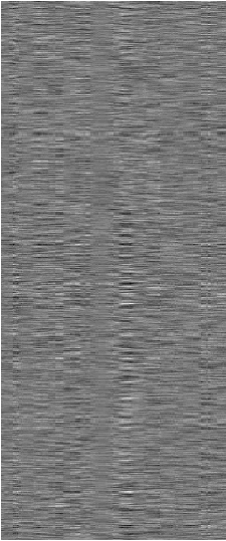

In [40]:
def npy_to_image(input_files, desired_pixel, dpi, height):
    plt.figure(figsize=(desired_pixel/dpi, desired_pixel/dpi), dpi=dpi)
    for input_file in input_files:
        data = np.load(input_file)
        path = './'+f'{input_file[-36:-4]}_537'
        # os.mkdir(path)
        for i in range(int(84000/height)):
            a = i * height
            plt.axis('off')
            plt.imshow(data[a:a+height,:], aspect="1", cmap='gray')
            plt.savefig(path+f'/{i+1}.png', bbox_inches='tight', pad_inches=0)
            plt.clf()
    return

input_files = sorted(glob.glob('*.npy'))
desired_pixel = 700
dpi = 10
height = 537
npy_to_image(input_files, desired_pixel, dpi, height)
